# Exercise 1: Linear Regression

*Solution Author: Brian Pardo*

*These are solutions to [programming exercise 1](https://www.coursera.org/learn/machine-learning/programming/8f3qT/linear-regression) for Coursera's Machine Learning course by Andrew Ng.*

In this exercise, we will implement a simple linear regression model with one and several features.

## Part 1. Linear regression with one variable

For the first part of the exercise, we will implement linear regression with one variable to predict profits for a food truck. We are given data for profits and populations from the cities with existing food trucks, and would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for the linear regression model. The first column is the population of a city and the second column is the food truck profit/loss in that city.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3D plotting

First we need to load the data from the text file:

In [25]:
mydata = np.loadtxt('ex1data1.txt', delimiter = ",")
mydata.shape

(97, 2)

Let's take a quick peek to see what our data looks like:

In [26]:
mydata[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

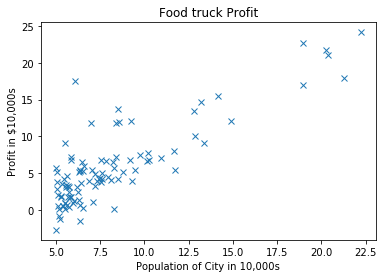

In [27]:
m = len(mydata) # number of datapoints
x = mydata[:,0] # city population
y = mydata[:,1] # profit

plt.plot(x,y,'x')
plt.title('Food truck Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

We see that there is a clear trend in this data, and we now want to fit our linear regression model so that we can make predictions of profits for new food truck locations. We will use gradient descent to make this prediction.

### Gradient descent algorithm

We want to find the set of parameters $\theta$ that minimize the cost function $$J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}.$$
The hypothesis for gradient descent is given by $$h_\theta(x)=X\theta,$$ where
$$X=\left[\begin{array}{cccc}
x_{0}^{(1)} & x_{1}^{(1)} & \ldots & x_{k}^{(1)} \\
x_{0}^{(2)} & x_{1}^{(2)} & \ldots & x_{k}^{(2)} \\
\vdots & \vdots & \vdots & \vdots \\
x_{0}^{(m)} & x_{1}^{(m)} & \ldots & x_{k}^{(m)}
\end{array}\right], \quad \theta=\left[\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{k}
\end{array}\right]$$

The gradient of the cost function is given by
$$\frac{\partial}{\partial\theta}J(\theta)=\frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}.$$

We then perform a simultaneous update of the parameters $\theta$ using
$$\theta:=\theta-\alpha\frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}.$$

Let's put this all together.

### Implementation

We will now implement the gradient descent algorithm to compute predicted profits using our data. First let's compute the cost function.

In [28]:
# Reshape x and y into column vectors
x = x.reshape(-1,1)
y = y.reshape(-1,1)

ones = np.ones((m,1))
x = np.append(ones,x,axis=1)

#initialize theta
theta = np.zeros((2,1))

In [29]:
# Cost function
def costFunction(x, y, theta):
    '''
    returns the cost function for a dataset and hypothesis
    '''
    h = np.matmul(x,theta) # hypothesis function
    J = (1/(2*m))*np.sum((h-y)**2) # cost function
    return J

costFunction(x, y, theta)

32.072733877455676

In [30]:
def gradientDescent(x, y, theta, iters, alpha):
    '''
    returns cost for each iteration of gradient descent and optimized parameters theta
    '''
    m = len(x)
    Jhistory = np.empty((iters,1))
    for i in range(iters):
        # Compute cost at each iteration
        Jhistory[i] = costFunction(x,y,theta)
        
        # Simultaneously update theta parameters
        h = np.matmul(x,theta) # hypothesis function
        theta = theta - (alpha/m)*np.matmul(x.T,(h-y))
    return Jhistory, theta

iterations = 1500
alpha = 0.01
Jhistory, theta = gradientDescent(x,y,theta,iterations,alpha)

Let's check to see that the gradient descent algorithm is converging in the number of iterations we chose.

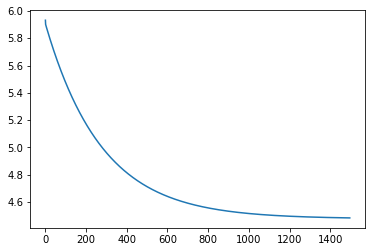

In [31]:
plt.plot(Jhistory[2:-1])
plt.show()

It does appear that it is converging. This gives us confidence to use our fitted model.

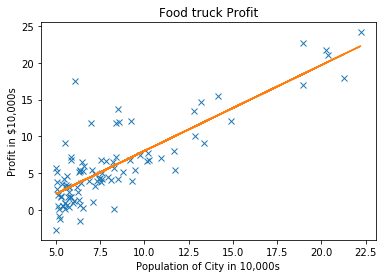

In [37]:
h = np.matmul(x,theta)
plt.plot(x[:,1],y,'x')
plt.plot(x[:,1],h)
plt.title('Food truck Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [10]:
print(f'Theta computed from gradient descent: [{theta[0][0]:.2f}, {theta[1][0]:.2f}]')

Theta computed from gradient descent: [-3.63, 1.17]


In [11]:
def predict(pop, theta):
    inputval = np.array([1,pop])
    return np.matmul(inputval,theta)[0]*10000

print(f'For population = 35,000, we predict a profit of ${predict(3.5,theta):,.2f}.')
print(f'For population = 70,000, we predict a profit of ${predict(7,theta):,.2f}.')

For population = 35,000, we predict a profit of $4,519.77.
For population = 70,000, we predict a profit of $45,342.45.


Let's now try to visualize the cost function.

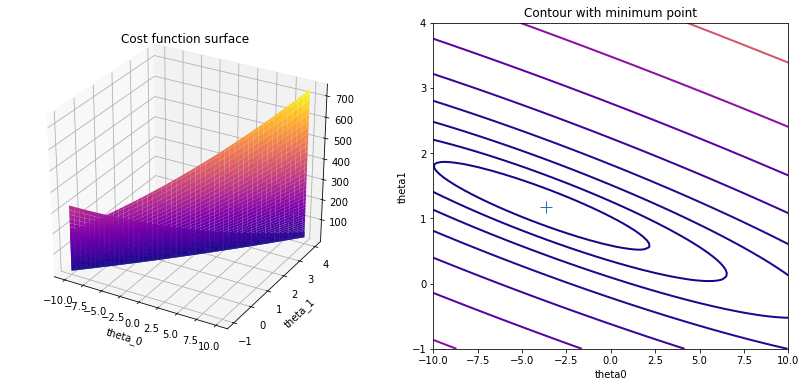

In [12]:
# Grid of values used to calculate J:
theta_vals = np.array([np.linspace(-10, 10, 100), np.linspace(-1, 4, 100)]).T
# Initializing J_vals to a matrix of 0's:
J_vals = np.empty((len(theta_vals), len(theta_vals)))

#Compute J_vals matrix
for i in range(len(theta_vals[:,0])):
    for j in range(len(theta_vals[:,1])):
        theta_vec = np.expand_dims(np.array([theta_vals[i,0],theta_vals[j,1]]),axis=1)
        J_vals[i,j] = costFunction(x, y, theta_vec)

# Surface plot
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta_vals[:,0], theta_vals[:,1], J_vals.T, cmap='plasma')
plt.xlabel('theta_0'); plt.ylabel('theta_1'); plt.title('Cost function surface')

# Contour plot
ax = fig.add_subplot(122)
plt.contour(theta_vals[:,0], theta_vals[:,1], J_vals.T, linewidths=2, cmap='plasma', levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], '+', ms=12)
plt.xlabel('theta0'); plt.ylabel('theta1'); plt.title('Contour with minimum point');

## Part 2: Linear regression with multiple variables

We will now use linear regression with multiple variables on training set of housing prices in Portland, Oregon that includes several features we may use to predict future housing prices. 

First, let's load the data. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [13]:
mydata = np.loadtxt('ex1data2.txt',delimiter=',')
np.shape(mydata)

(47, 3)

In [14]:
x = mydata[:,:-1] # Features
y = np.expand_dims(mydata[:,-1],axis = 1) # Price of home
m = len(mydata) # Number of training examples

In [15]:
for i in range(5):
    print(f'features = [{x[i][0]:.1f}, {x[i][1]:.0f}], price = ${y[i][0]:,.2f}')

features = [2104.0, 3], price = $399,900.00
features = [1600.0, 3], price = $329,900.00
features = [2400.0, 3], price = $369,000.00
features = [1416.0, 2], price = $232,000.00
features = [3000.0, 4], price = $539,900.00


In [16]:
# normalize features
def normalize(x, mean, std):
    # normalize with mean of training set features
    return (x - mean[None,:])/std[None,:]

# normalize training set features
xmean = np.mean(x,axis=0); xstd = np.std(x,axis=0)
print(xmean,xstd)
X = normalize(x, xmean, xstd)

def add_ones(x):
    # add ones column to x
    ones = np.ones((len(x),1))
    return np.append(ones,x,axis=1)

X=add_ones(X)

[2000.68085106    3.17021277] [7.86202619e+02 7.52842809e-01]


Theta computed from gradient descent: 340412.66, 109447.80, -6578.35


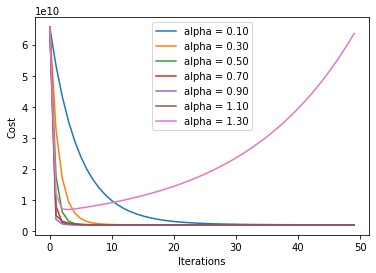

In [17]:


# Run gradient descent
# Choose some alpha values
alphas = [i/10. for i in range(1,14,2)]
num_iters = 50;
for alpha in alphas:
    #initialize theta
    theta = np.zeros((len(X[1]),1))
    # Run gradient descent
    Jhistory, theta = gradientDescent(X, y, theta, num_iters, alpha);
    # Display gradient descent's result
    plt.plot(Jhistory, label = f'alpha = {alpha:.2f}')
    
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

# Choose a learning rate and number of iterations
alpha = 1.1; num_iters = 100;
theta = np.zeros((len(X[1]),1))
_, theta = gradientDescent(X, y, theta, num_iters, alpha);
print(f'Theta computed from gradient descent: {theta[0][0]:.2f}, {theta[1][0]:.2f}, {theta[2][0]:.2f}')
plt.show()

In [18]:
preds = np.array([[1650,3],[3000,4],[850,2],[3600,4],[4100,6]])
preds_norm = normalize(preds, xmean, xstd)
preds_norm_ones = add_ones(preds_norm)

In [19]:
predictions = np.matmul(preds_norm_ones,theta)[:,0]

for i in range(len(predictions)):
    print(f'A {preds[i,0]:.0f} sq.ft. house with {preds[i,1]:.0f} rooms is valued at ${predictions[i]:,.2f}')

A 1650 sq.ft. house with 3 rooms is valued at $293,081.46
A 3000 sq.ft. house with 4 rooms is valued at $472,277.86
A 850 sq.ft. house with 2 rooms is valued at $190,450.94
A 3600 sq.ft. house with 4 rooms is valued at $555,804.26
A 4100 sq.ft. house with 6 rooms is valued at $607,933.56


In [20]:
def normalEquation(x, y):
    x = add_ones(x)
    return np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T,x)),x.T),y)

In [21]:
preds_ones = add_ones(preds)
predictions = np.matmul(preds_ones,normalEquation(x,y))

for i in range(len(predictions)):
    print(f'A {preds[i,0]:.0f} sq.ft. house with {preds[i,1]:.0f} rooms is valued at ${predictions[i][0]:,.2f}')

A 1650 sq.ft. house with 3 rooms is valued at $293,081.46
A 3000 sq.ft. house with 4 rooms is valued at $472,277.86
A 850 sq.ft. house with 2 rooms is valued at $190,450.94
A 3600 sq.ft. house with 4 rooms is valued at $555,804.26
A 4100 sq.ft. house with 6 rooms is valued at $607,933.56
